In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crowdflower-weather-twitter/sampleSubmission.csv
/kaggle/input/crowdflower-weather-twitter/variableNames.txt
/kaggle/input/crowdflower-weather-twitter/train.csv
/kaggle/input/crowdflower-weather-twitter/test.csv


In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

# Plotting packs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#NLP packs
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from textblob import TextBlob , Word
import re 
import string


##Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

#Machine learning Packs
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
train = pd.read_csv("/kaggle/input/crowdflower-weather-twitter/train.csv")
test = pd.read_csv('/kaggle/input/crowdflower-weather-twitter/test.csv')
submission = pd.read_csv('/kaggle/input/crowdflower-weather-twitter/sampleSubmission.csv')

In [4]:
train.head()

,id,tweet,state,location,s1,s2,s3,s4,s5,w1,w2,w3,w4,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},oklahoma,Oklahoma,0.0,0.0,1.0,0.000,0.000,0.800,0.0,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,florida,Miami-Ft. Lauderdale,0.0,0.0,0.0,1.000,0.000,0.196,0.0,0.804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,idaho,NaN,0.0,0.0,0.0,0.000,1.000,0.000,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,minnesota,Minneapolis-St. Paul,0.0,0.0,0.0,1.000,0.000,1.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,rhode island,Purgatory,0.0,0.0,0.0,0.403,0.597,1.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [5]:
test.head()

,id,tweet,state,location
0,4,Edinburgh peeps is it sunny?? #weather,NaN,birmingham
1,5,"SEEVERE T’STORM WARNING FOR TROUSDALE, NORTHW...",NaN,Nashville
2,7,@Agilis1 sport or traditional climbing? Thats ...,NaN,Midwest
3,8,#WEATHER: 10:53 am : 63.0F. Feels 61F. 30.07% ...,tennessee,"Nashville, TN, USA"
4,12,We used to use umbrellas to face the bad weath...,NaN,Houston


In [6]:
df=train.append(test)
df.head()

,id,tweet,state,location,s1,s2,s3,s4,s5,w1,w2,w3,w4,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},oklahoma,Oklahoma,0.0,0.0,1.0,0.000,0.000,0.800,0.0,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,florida,Miami-Ft. Lauderdale,0.0,0.0,0.0,1.000,0.000,0.196,0.0,0.804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,idaho,NaN,0.0,0.0,0.0,0.000,1.000,0.000,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,minnesota,Minneapolis-St. Paul,0.0,0.0,0.0,1.000,0.000,1.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,rhode island,Purgatory,0.0,0.0,0.0,0.403,0.597,1.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


<AxesSubplot:ylabel='state'>

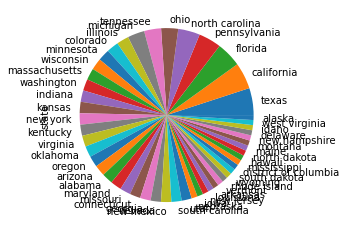

In [7]:
df.state.value_counts().plot.pie()

## Data Cleaning

In [8]:
df['tweet']=df['tweet'].str.lower().str.replace('[^\w\s]','').str.replace('\d+','').str.replace('\n',' ').replace('\r','').str.replace("[^a-zA-Z0-9\s]",'').str.replace("mention", "").str.replace("rt", "").str.replace("link", "")    

In [9]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df['tweet'] = df['tweet'].apply(lambda x : word_tokenize(x.lower())) # cumle -> words
df["tweet"] = df["tweet"].apply(lambda x : [word for word in x if word not in STOPWORDS]) # stop words cikarma
df["tweet"] = df["tweet"].apply(lambda x : [WordNetLemmatizer().lemmatize(word) for word in x]) # kelimelerin kok halleri
df["tweet"] = df["tweet"].apply(lambda x : " ".join(x)) # kelimleri birleştirdik

In [11]:
df

,id,tweet,state,location,s1,s2,s3,s4,s5,w1,w2,w3,w4,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,jazz rainy afternoon,oklahoma,Oklahoma,0.0,0.0,1.0,0.000,0.000,0.800,0.0,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,love rainy day,florida,Miami-Ft. Lauderdale,0.0,0.0,0.0,1.000,0.000,0.196,0.0,0.804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,good morning chicago time kick windy city nut ...,idaho,NaN,0.0,0.0,0.0,0.000,1.000,0.000,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,preach lol alliwantis type weather time live b...,minnesota,Minneapolis-St. Paul,0.0,0.0,0.0,1.000,0.000,1.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,good morning sunshine,rhode island,Purgatory,0.0,0.0,0.0,0.403,0.597,1.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42152,120094,kno damn weather ppl betta stop interruptin tn...,NaN,"Greensboro, NC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42153,120096,fuckkkk fucking snow carrr,NaN,"Denver, Colorado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42154,120099,good thing weather ale app setting volcano war...,NaN,Indianapolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42155,120101,tornado record set april counting weather http...,NaN,Greensboro NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def word_cleaner(data):
    words=[re.sub("[^a-zA-Z]"," ",i)for i in data] # noktalamalı kaldır
    words=[i.lower()for j in words for i in j.split()]#Splitting all the sentences into words# cümleleri kelimeye dönüştür
    words=[i for i in words if not i in set(stopwords.words("english"))]#removing stopwords
    words=[i for i in words if len(i)>2 ]#2 den büyük kelimeleri al # bu ozellik wordcloud da zaten var aslinda
    return words

<AxesSubplot:xlabel='Top Words', ylabel='Frequency'>

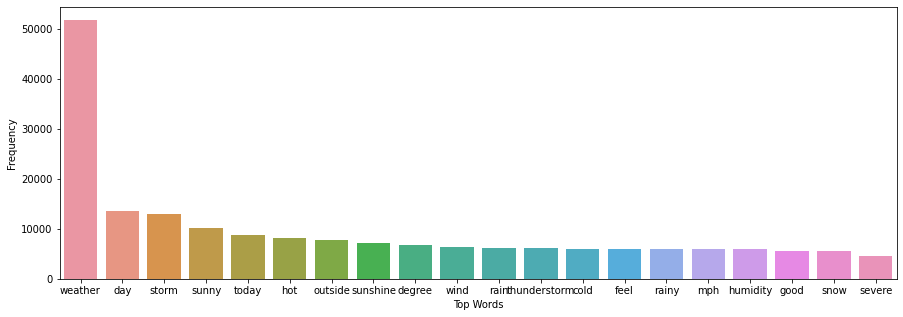

In [13]:
words_freq = pd.DataFrame(nltk.FreqDist(word_cleaner(df.tweet)).most_common(20), columns=['Top Words', 'Frequency'])
plt.figure(figsize=(15,5))
sns.barplot(x="Top Words",y="Frequency",data=words_freq)

## Deep Learning

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])
df_dtm=pad_sequences(sequences)

df_train_dtm = df_dtm[:train.shape[0]]
df_test_dtm = df_dtm[train.shape[0]:]

In [15]:
df_dtm.shape

(120103, 25)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM, Embedding, Bidirectional, BatchNormalization

model=Sequential()
model.add(Embedding(10000, 500, input_length=df_train_dtm.shape[1])),
model.add(Bidirectional(LSTM(64,  activation='relu'))),

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(24, activation='softmax'))
model.summary() 

2022-08-27 12:13:41.416599: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-27 12:13:41.550913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-27 12:13:41.551782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-27 12:13:41.553552: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 500)           5000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               289280    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2

In [17]:
from tensorflow.keras.utils import to_categorical
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse'])
history = model.fit(df_train_dtm, train.iloc[:,4:], validation_split=0.20, epochs=5, batch_size=289, verbose=1)

Epoch 1/5


2022-08-27 12:13:44.593174: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


216/216 [==============================] - 28s 112ms/step - loss: 10.0709 - mse: 0.0816 - val_loss: 8.6972 - val_mse: 0.0828
Epoch 2/5
216/216 [==============================] - 24s 111ms/step - loss: 11.5708 - mse: 0.0730 - val_loss: 12.1675 - val_mse: 0.0726
Epoch 3/5
216/216 [==============================] - 24s 109ms/step - loss: 14.4830 - mse: 0.0720 - val_loss: 16.0351 - val_mse: 0.0684
Epoch 4/5
216/216 [==============================] - 24s 111ms/step - loss: 17.9845 - mse: 0.0730 - val_loss: 17.7700 - val_mse: 0.0694
Epoch 5/5
216/216 [==============================] - 23s 108ms/step - loss: 21.5535 - mse: 0.0738 - val_loss: 23.1288 - val_mse: 0.0726


In [18]:
pred=model.predict(df_test_dtm)
pred

array([[2.2343380e-05, 1.4341471e-09, 1.3736764e-02, ..., 5.2464437e-01,
        1.5494610e-10, 2.4805888e-06],
       [3.8604941e-10, 4.9888203e-15, 9.0565137e-04, ..., 2.0780774e-17,
        4.3469397e-03, 4.0500123e-05],
       [2.9734275e-03, 7.2162975e-06, 2.8666028e-01, ..., 2.8949669e-08,
        8.5832243e-04, 1.3608396e-05],
       ...,
       [7.8874454e-04, 2.5121193e-07, 5.1440507e-01, ..., 3.2393461e-07,
        7.0814084e-04, 2.7265720e-04],
       [3.1058804e-09, 1.9922477e-11, 1.2617203e-04, ..., 1.5815666e-21,
        5.9872538e-02, 2.0047393e-07],
       [1.6697278e-07, 2.4680069e-12, 7.1811060e-05, ..., 5.7126456e-01,
        2.7689702e-12, 7.8591800e-09]], dtype=float32)

In [19]:
variableNames = ['s1','s2','s3','s4','s5','w1','w2','w3','w4','k1','k2','k3','k4','k5','k6','k7','k8','k9','k10','k11','k12','k13','k14','k15']

In [20]:
predictionsFrame = pd.DataFrame(data=pred, columns=variableNames)

In [21]:
submission = pd.concat([test['id'], predictionsFrame], axis=1)
submission.to_csv('submission.csv', index=False)
submission.head()

,id,s1,s2,s3,s4,s5,w1,w2,w3,w4,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,4,2.234338e-05,1.434147e-09,0.013737,4.096125e-01,1.474563e-03,4.412152e-02,1.654201e-05,2.077742e-03,4.508406e-07,3.921664e-08,1.522338e-13,1.484561e-07,1.133381e-10,1.999689e-07,1.687088e-13,1.514022e-05,1.234204e-12,4.274650e-03,4.853837e-07,1.381182e-10,1.592266e-08,5.246444e-01,1.549461e-10,0.000002
1,5,3.860494e-10,4.988820e-15,0.000906,1.172499e-14,2.535493e-08,2.824031e-07,2.779978e-03,2.282081e-07,2.267645e-03,4.176324e-06,3.454345e-18,5.988894e-14,4.054760e-19,3.211053e-06,8.269976e-15,1.789706e-11,1.232403e-11,1.215096e-07,1.295503e-06,7.291249e-06,9.896426e-01,2.078077e-17,4.346940e-03,0.000041
2,7,2.973428e-03,7.216297e-06,0.286660,6.685141e-05,1.580740e-02,1.587979e-01,1.748100e-01,1.102138e-01,3.999354e-02,1.338708e-05,6.708576e-10,2.876963e-07,4.490792e-08,5.195682e-06,3.911497e-09,1.145503e-01,6.677835e-08,3.938597e-02,3.822126e-02,1.789166e-04,1.744232e-02,2.894967e-08,8.583224e-04,0.000014
3,8,3.065358e-15,6.686215e-24,0.951681,3.208197e-35,5.919273e-10,4.770717e-02,1.477650e-11,6.276844e-12,3.580393e-14,9.017122e-14,8.119366e-28,5.046107e-27,1.641241e-26,2.270947e-05,0.000000e+00,2.898844e-25,6.588680e-33,2.379657e-07,1.056075e-15,4.497228e-30,2.243089e-10,1.531373e-36,3.149317e-19,0.000589
4,12,6.219095e-04,1.521924e-06,0.477937,9.148827e-08,7.082114e-03,2.061196e-01,6.650356e-02,3.801819e-02,3.241465e-02,3.986157e-06,7.629393e-11,2.239289e-09,2.472844e-09,2.536468e-06,1.009120e-11,3.424268e-03,2.763608e-09,1.320005e-02,1.209110e-01,2.290342e-05,3.325900e-02,6.128913e-12,4.706746e-04,0.000007
